<a href="https://colab.research.google.com/github/Luan-vP/glider/blob/main/Glider_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path

repository_path = Path('.').resolve()

!pip install -Uqq -r {repository_path}/requirements.txt -r {repository_path}/requirements-dev.txt

!export PYTHONPATH=$PYTHONPATH:..:../src
!echo $PYTHONPATH

In [6]:
import mujoco

from optimization import setup_drop_test
from vehicle import create_glider_xml
from constants import DEFAULT_STL_FILEPATH
from observability import extract_forwards_accn

world_xml = setup_drop_test()



time_series_accn = extract_forwards_accn(setup_drop_test())




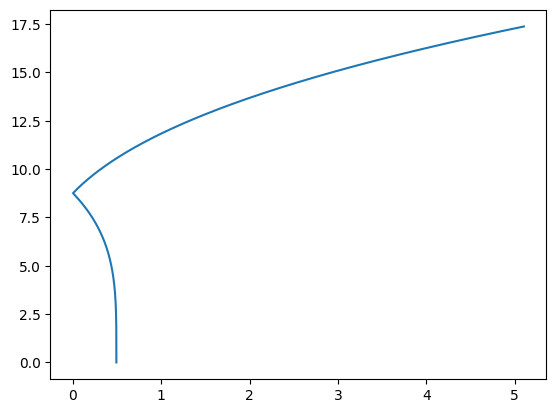

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()



time_lables = np.linspace(0, 17.38, len(time_series_accn))

ax.plot(time_lables, time_series_accn, label="Acceleration")



Render a generation of "gliders" definted by their STL vertices.

In [14]:
from vehicle import Vehicle
from constants import DEFAULT_STL_FILEPATH
from optimization import measure_drop_test
import simulation
from visualize import render_initial_pixels

import mediapy as media


def prep_generation(population: int = 6) -> list[Vehicle]:
    population = [Vehicle(filename=DEFAULT_STL_FILEPATH) for i in range(population)]
    for v in population:
        v.mutate()
    
    return population

generation = [Vehicle(filename=DEFAULT_STL_FILEPATH) for i in range(6)]
print(generation)



[Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle(), Vehicle()]


In [29]:
max_distance = max(results)
winning_glider = generation[results.index(max_distance)]

# --------   #

new_generation = []
results = []
for i in range(0, len(generation)):
    vehicle = Vehicle(vertices=winning_glider.vertices)
    vehicle.mutate()

    new_generation.append(vehicle)
    result = measure_drop_test(*v.create_glider_from_vertices(), height=800)
    results.append(result)

generation = new_generation


Max distance:  50.37597028123282


""

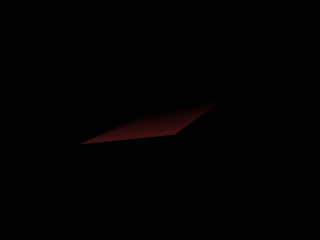

50.37597028123282


In [30]:
# find max distance in 'results' array

max_distance = max(results)
winning_glider = generation[results.index(max_distance)]

print("Max distance: ", max_distance)
orientation = [200, 200, 100]
world_xml = simulation.wrap_glider(
    *winning_glider.create_glider_from_vertices(
        orientation=orientation,
        scale=4.0,
    )
)
media.show_image(render_initial_pixels(world_xml))
print(result)

In [33]:
import simulation

world_xml = simulation.drop_test_glider(
    *winning_glider.create_glider_from_vertices(),
    height=800
)

with open("/Users/luan/Developer/glider/assets/worlds/world.xml", "w") as f:
    f.write(world_xml)